In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Sampling from Wiener process
np.random.seed(0)
N = 500
T = 1
S = 1000
dT = T / N

t = np.linspace(0,T,N)

# Jumps N(0,dT) - sample wiener process
dW = dT ** 0.5 * np.random.normal(size=(N-1, S))
W = np.concatenate([np.zeros(shape=(1,S)), np.cumsum(dW,axis=0)], axis=0)

# Sample Deterministic X
X = np.exp(t[:,None] + 0.5*W)
X_mean = np.mean(X, axis=1)
X_stdev = np.var(X, axis=1) ** 0.5

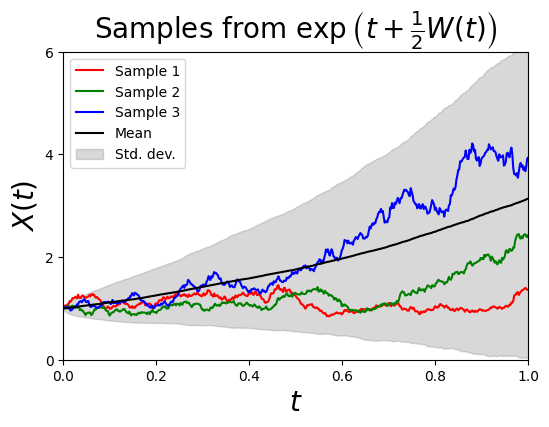

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(t, X[:, 0], color='r', label='Sample 1')
plt.plot(t, X[:, 1], color='g', label='Sample 2')
plt.plot(t, X[:, 2], color='b', label='Sample 3')

plt.plot(t, X_mean, color='k', label='Mean')
plt.fill_between(t,
                 X_mean - 2 * X_stdev,
                 X_mean + 2 * X_stdev,
                 color='gray',
                 alpha=0.3,
                 label='Std. dev.')

plt.xticks(np.linspace(0, T, 6))
plt.yticks(np.linspace(0, 6, 4))
plt.xlim([0, 1])
plt.ylim([0, 6])

plt.title(r'Samples from $\exp\left(t + \frac{1}{2} W(t)\right)$', fontsize=20)
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$X(t)$', fontsize=20)
plt.legend()
plt.show()

In [50]:
X_truemean = np.exp(t*9/8)
X_truevar = np.exp(t*5/2) - np.exp(t*9/4)

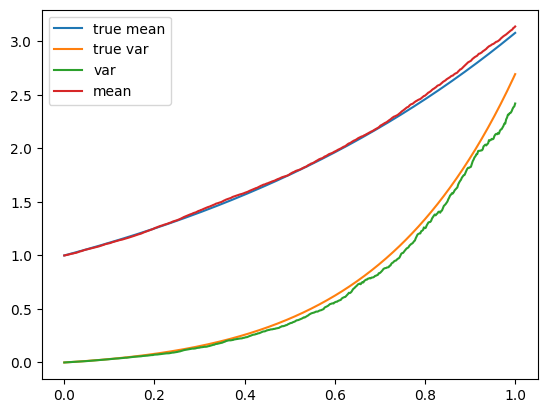

In [52]:
plt.plot(t,X_truemean,label="true mean")
plt.plot(t,X_truevar, label="true var")
plt.plot(t,X_stdev**2,label="var")
plt.plot(t,X_mean, label="mean")
plt.legend()
plt.show()

In [53]:
def euler_maruyama(seed, X0, T, N, f, g):
    np.random.seed(seed)

    dt = T/N
    X = [X0]
    t = np.linspace(0,T,N+1)

    # Sample Wiener process
    dW = dt ** 0.5 * np.random.normal(size=(N,))

    for i in range(N):
        # Euler-Maruyama
        dX = f(X[-1], t[i]) * dt + g(X[-1], t[i]) * dW[i]

        # Store new X
        X.append(X[-1] + dX)

    W = np.concatenate([[0], np.cumsum(dW)])

    return t, X, W

In [54]:
def f_g_black_scholes(lamda, mu):
    
    def f(X, t):
        return lamda * X
    
    def g(X, t, grad=False):
        return mu if grad else mu * X
    
    return f, g

def exact_black_scholes(X0, t, W, lamda, mu):
    return X0 * np.exp((lamda - 0.5 * mu ** 2) * t + mu * W)

In [61]:
# Black-Scholes parameters
lamda = 2
mu = 1

# Seed and integration parameters
seed = 0
X0 = 1
T = 1
N = int(1e2)

# Get drift and diffusion functions of the Black-Scholes model
f, g = f_g_black_scholes(lamda=lamda, mu=mu)

# Solve approximately via the EM method
t, X, W = euler_maruyama(seed=seed, X0=X0, T=T, N=N, f=f, g=g)

# Get the exact solution for the same W sample
X_exact = exact_black_scholes(X0=X0, t=t, W=W, lamda=lamda, mu=mu)

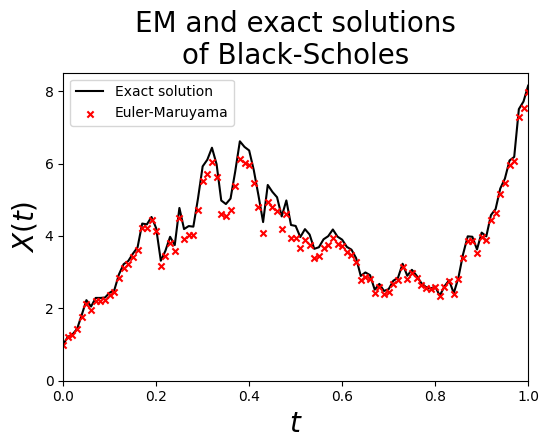

In [62]:
plt.figure(figsize=(6, 4))
plt.plot(t, X_exact, color='k', zorder=1, label='Exact solution')
plt.scatter(t, X, s=20, marker='x', color='red', zorder=2, label='Euler-Maruyama')

plt.xlim([0, T])
plt.xticks(np.linspace(0, 1, 6))
plt.yticks(np.linspace(0, 8, 5))
plt.title('EM and exact solutions\nof Black-Scholes', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$X(t)$', fontsize=20)
plt.legend()
plt.show()